<a href="https://colab.research.google.com/github/jford59/ML1/blob/main/ML1/HW4/ML4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


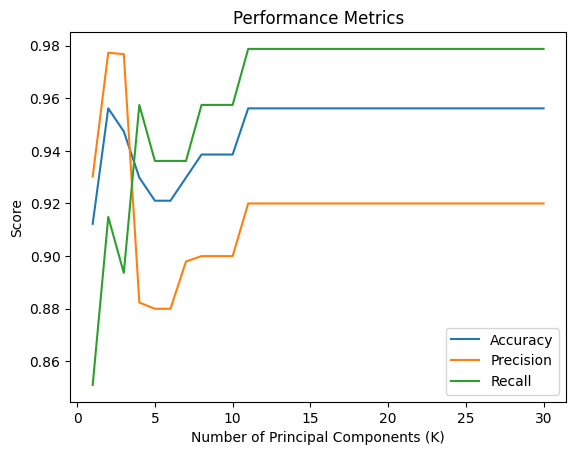

SVM Accuracies: [0.956140350877193, 0.9122807017543859, 0.9298245614035088]
Logistic Regression Accuracy: 0.9473684210526315


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
cancer.isnull().sum()*100/cancer.shape[0]

cancer.head()

cancer.pop("id")
cancer.pop("Unnamed: 32")

cancer["diagnosis"] = cancer["diagnosis"].map({'M':1,'B':0})

np.random.seed(0)
df_train, df_test = train_test_split(cancer, train_size = 0.8)

y_train = df_train.pop("diagnosis").values
y_test = df_test.pop("diagnosis").values
x_train = df_train.values
x_test = df_test.values


K_values = np.arange(1, x_train.shape[1] + 1)
recall_scores = []
precision_scores = []
accuracy_scores = []

for K in K_values:
    pca = PCA(n_components=K)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    svm = SVC(kernel='linear')
    svm.fit(x_train_pca, y_train)
    y_pred = svm.predict(x_test_pca)

    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure()
plt.plot(K_values, accuracy_scores, label='Accuracy')
plt.plot(K_values, precision_scores, label='Precision')
plt.plot(K_values, recall_scores, label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.legend()
plt.show()

kernels = ['linear', 'poly', 'rbf']
svm_accuracies = []

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    svm_accuracies.append(accuracy)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

print("SVM Accuracies:", svm_accuracies)
print("Logistic Regression Accuracy:", logreg_accuracy)